In [43]:
import yfinance as yf
import pandas as pd
import numpy as np
import lightgbm as lgb
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

stocks = [ "RELIANCE.NS", "HDFCBANK.NS", "TCS.NS", "INFY.NS", "ICICIBANK.NS", "SBIN.NS", "BHARTIARTL.NS", "BAJFINANCE.NS", "HINDUNILVR.NS", "LT.NS" ]
results = []

for ticker in stocks:
    print(f"\nTraining for {ticker}")

    #  Download Data
    data = yf.download(ticker, start="2015-01-01", auto_adjust=True)
    if len(data) < 100:
        continue

    #  Feature Engineering
    data["Return"] = data["Close"].pct_change()
    data["SMA_5"] = data["Close"].rolling(5).mean()
    data["SMA_20"] = data["Close"].rolling(20).mean()
    data["EMA_10"] = data["Close"].ewm(span=10).mean()
    data["Volatility"] = data["Return"].rolling(10).std()
    data["Momentum"] = data["Close"] - data["Close"].shift(5)

    for i in range(1, 6):
        data[f"Lag_{i}"] = data["Return"].shift(i)

    data["Target"] = np.where(data["Return"].shift(-1) > 0.01, 1, 0)
    data.dropna(inplace=True)

    #  Split
    split = int(len(data) * 0.8)

    X = data.drop(columns=["Target"])
    y = data["Target"]

    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    #  Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Model
    model = lgb.LGBMClassifier(random_state=42)
    model.fit(X_train_scaled, y_train)

    #  Evaluation
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    results.append({
        "Stock": ticker,
        "Accuracy": round(accuracy, 3),

    })

    #  Save Model Separately
    stock_name = ticker.replace(".NS", "")

    with open(f"{stock_name}_model.pkl", "wb") as f:
        pickle.dump(model, f)

    with open(f"{stock_name}_scaler.pkl", "wb") as f:
        pickle.dump(scaler, f)

    with open(f"{stock_name}_features.pkl", "wb") as f:
        pickle.dump(X.columns.tolist(), f)

    print(f"Saved model for {ticker}")

# Final Accuracy Table
print("Accuracy of all 10 Stocks")
results_df = pd.DataFrame(results)
results_df


Training for RELIANCE.NS


[*********************100%***********************]  1 of 1 completed


[LightGBM] [Info] Number of positive: 553, number of negative: 1637
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.252511 -> initscore=-1.085263
[LightGBM] [Info] Start training from score -1.085263
Saved model for RELIANCE.NS

Training for HDFCBANK.NS


[*********************100%***********************]  1 of 1 completed


[LightGBM] [Info] Number of positive: 406, number of negative: 1784
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.185388 -> initscore=-1.480260
[LightGBM] [Info] Start training from score -1.480260
Saved model for HDFCBANK.NS

Training for TCS.NS


[*********************100%***********************]  1 of 1 completed


[LightGBM] [Info] Number of positive: 478, number of negative: 1712
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218265 -> initscore=-1.275807
[LightGBM] [Info] Start training from score -1.275807
Saved model for TCS.NS

Training for INFY.NS


[*********************100%***********************]  1 of 1 completed


[LightGBM] [Info] Number of positive: 536, number of negative: 1654
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.244749 -> initscore=-1.126818
[LightGBM] [Info] Start training from score -1.126818
Saved model for INFY.NS

Training for ICICIBANK.NS


[*********************100%***********************]  1 of 1 completed


[LightGBM] [Info] Number of positive: 570, number of negative: 1620
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.260274 -> initscore=-1.044545
[LightGBM] [Info] Start training from score -1.044545
Saved model for ICICIBANK.NS

Training for SBIN.NS


[*********************100%***********************]  1 of 1 completed


[LightGBM] [Info] Number of positive: 598, number of negative: 1592
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.273059 -> initscore=-0.979156
[LightGBM] [Info] Start training from score -0.979156
Saved model for SBIN.NS

Training for BHARTIARTL.NS


[*********************100%***********************]  1 of 1 completed


[LightGBM] [Info] Number of positive: 551, number of negative: 1639
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.251598 -> initscore=-1.090107
[LightGBM] [Info] Start training from score -1.090107
Saved model for BHARTIARTL.NS

Training for BAJFINANCE.NS


[*********************100%***********************]  1 of 1 completed


[LightGBM] [Info] Number of positive: 637, number of negative: 1553
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.290868 -> initscore=-0.891174
[LightGBM] [Info] Start training from score -0.891174
Saved model for BAJFINANCE.NS

Training for HINDUNILVR.NS


[*********************100%***********************]  1 of 1 completed


[LightGBM] [Info] Number of positive: 428, number of negative: 1762
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.195434 -> initscore=-1.415082
[LightGBM] [Info] Start training from score -1.415082
Saved model for HINDUNILVR.NS

Training for LT.NS


[*********************100%***********************]  1 of 1 completed

[LightGBM] [Info] Number of positive: 496, number of negative: 1694
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 2190, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.226484 -> initscore=-1.228272
[LightGBM] [Info] Start training from score -1.228272
Saved model for LT.NS
Accuracy of all 10 Stocks


,Stock,Accuracy
0,RELIANCE.NS,0.807
1,HDFCBANK.NS,0.816
2,TCS.NS,0.799
3,INFY.NS,0.768
4,ICICIBANK.NS,0.828
5,SBIN.NS,0.783
6,BHARTIARTL.NS,0.761
7,BAJFINANCE.NS,0.757
8,HINDUNILVR.NS,0.821
9,LT.NS,0.763


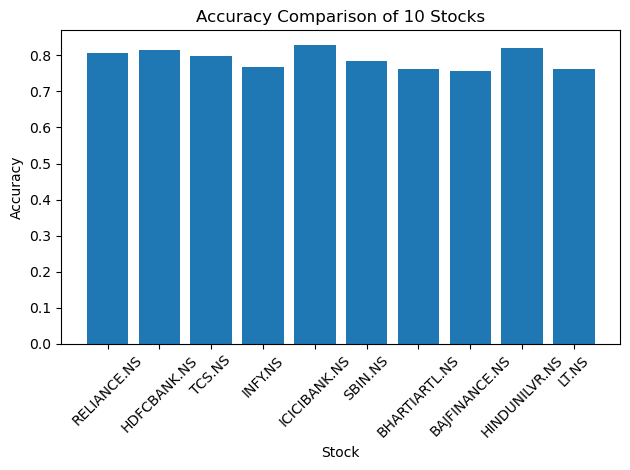

In [45]:
import matplotlib.pyplot as plt
plt.figure()
plt.bar(results_df["Stock"], results_df["Accuracy"])
plt.xlabel("Stock")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of 10 Stocks")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()